In [99]:
import numpy as np
import matplotlib.pyplot as plt

small = False

if small:
    with open('input9_small.txt') as f:
        data = f.read().splitlines()
else:
    with open('input9.txt') as f:
        data = f.read().splitlines()


In [100]:
def walk(dir,x,y):
    if dir == 'R':
        x += 1
    elif dir == 'L':
        x -= 1
    elif dir == 'U':
        y += 1
    elif dir == 'D':
        y -= 1

    return x,y

def distance(x_H,y_H,x_T,y_T):
    return(np.sqrt(pow(x_H-x_T,2) + pow(y_H-y_T,2)))

def walk_diagonal(x_H,y_H,x_T,y_T):
    if x_H > x_T and y_H > y_T: #up and right
        x_T += 1
        y_T += 1
    elif x_H > x_T and y_H < y_T: #down and right
        x_T +=1
        y_T -=1
    elif x_H < x_T and y_H > y_T: #up and left
        x_T -= 1
        y_T += 1
    elif x_H < x_T and y_H < y_T: #down and left
        x_T -= 1
        y_T -= 1
    return x_T,y_T
    

Answer 1: 5683


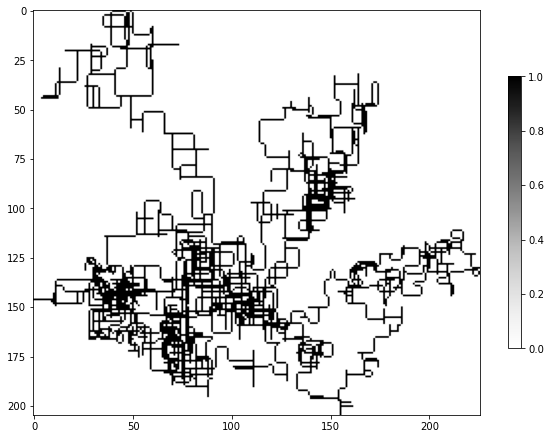

In [101]:
x_H = 0 
y_H = 0

x_T = 0
y_T = 0

positions_visited = [[0,0]]

for i in data:
    (dir,stepsize) = i.split(' ')
    for j in range(int(stepsize)):
        x_H,y_H = walk(dir,x_H,y_H)        
        if ((x_H == x_T) or (y_H == y_T)) and (distance(x_H,y_H,x_T,y_T) > 1):  #same row/column + distance > 1
            x_T,y_T = walk(dir,x_T,y_T)
        # elif ((x_H == x_T) or (y_H == y_T)) and (distance(x_H,y_H,x_T,y_T) <= 1): #same row/column + distance <= 1
        # elif ((x_H != x_T) or (y_H != y_T)) and (distance(x_H,y_H,x_T,y_T) <= np.sqrt(2)): #different row/column + distance <= 1    
        elif ((x_H != x_T) or (y_H != y_T)) and (distance(x_H,y_H,x_T,y_T) > np.sqrt(2)): #different row/column + distance > 1
            x_T,y_T = walk_diagonal(x_H,y_H,x_T,y_T)

        if not [x_T,y_T] in positions_visited:
            positions_visited.append([x_T,y_T])
        
print(f'Answer 1: {len(positions_visited)}')

min_x = min([i[0] for i in positions_visited])
max_x = max([i[0] for i in positions_visited])
min_y = min([i[1] for i in positions_visited])
max_y = max([i[1] for i in positions_visited])

postions_array = np.zeros((max_y-min_y+1,max_x-min_x+1))

for x in positions_visited:
    postions_array[x[1]+abs(min_y),x[0]+abs(min_x)] = 1

fig, ax = plt.subplots(figsize=(10,10))
im = plt.imshow(np.flip(postions_array, axis=0),cmap='Greys')
cbar = ax.figure.colorbar(im,
                          ax=ax,
                          shrink=0.5)

